In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Tensorflow Graph Based Models:
- Nodes - Mathematical Operations
- Edges - Tensors (/Multi-Dimensional Arrays)

<h3> Linear Regression </h3>

<h5> Download Data: </h5>

In [61]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-21 20:20:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[=====================>]  70.93K  --.-KB/s   in 0.04s  

2019-02-21 20:20:21 (1.63 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [62]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h3> Predicting Co2 Emissions of Cars Based on their Engine Size: </h3>

We'll build a simple linear regression model based on the following equation: 

$$Y = a X + b $$

In [63]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

Initialize <b>a</b> and <b>b</b> with a random guess (quick way but not efficient for production based models)

In [64]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

Define Model:

In [65]:
y = a * train_x + b

Define Loss Function:

In [66]:
loss = tf.reduce_mean(tf.square(y - train_y))

Define Optimizer -- Here we use Gradient Descent and specify the learning rate

In [67]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

Define training method:

In [68]:
train = optimizer.minimize(loss)

Initialize the Variables:

In [69]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

Start the optimization and run the graph:

In [70]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print("Step: ", step, "\tLoss: ", loss_val, "\tA: ", a_val, "\tB: ", b_val)
        train_data.append([a_val, b_val])

Step:  0 	Loss:  26992.576 	A:  77.07106 	B:  46.110275
Step:  5 	Loss:  1891.72 	A:  58.84462 	B:  47.59573
Step:  10 	Loss:  1762.7239 	A:  57.65104 	B:  53.019833
Step:  15 	Loss:  1653.5897 	A:  56.36652 	B:  58.023922
Step:  20 	Loss:  1559.0441 	A:  55.172844 	B:  62.68204
Step:  25 	Loss:  1477.1368 	A:  54.061794 	B:  67.01765
Step:  30 	Loss:  1406.1786 	A:  53.027664 	B:  71.05309
Step:  35 	Loss:  1344.7062 	A:  52.065136 	B:  74.809135
Step:  40 	Loss:  1291.4503 	A:  51.169243 	B:  78.30513
Step:  45 	Loss:  1245.3143 	A:  50.335377 	B:  81.55909
Step:  50 	Loss:  1205.3451 	A:  49.559242 	B:  84.58777
Step:  55 	Loss:  1170.7184 	A:  48.836845 	B:  87.406746
Step:  60 	Loss:  1140.721 	A:  48.164463 	B:  90.03056
Step:  65 	Loss:  1114.734 	A:  47.53863 	B:  92.47271
Step:  70 	Loss:  1092.2201 	A:  46.956135 	B:  94.74577
Step:  75 	Loss:  1072.7157 	A:  46.413963 	B:  96.861465
Step:  80 	Loss:  1055.8193 	A:  45.90933 	B:  98.83068
Step:  85 	Loss:  1041.1809 	A:  45.4

Plot Loss Values:

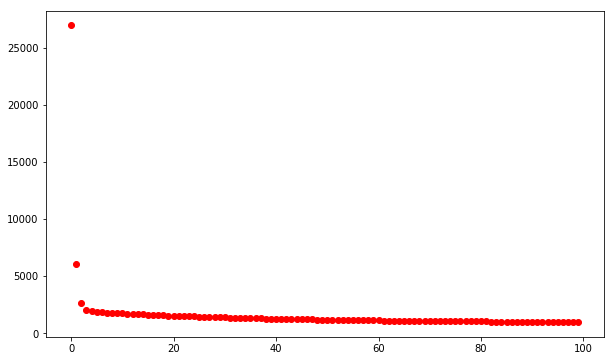

In [71]:
plt.plot(loss_values, 'ro')